#### Scikit-Learn 문서 전처리 기능
- BOW(Bag of Word)

In [2]:
# DictVectorizer
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
# 첫번째 문서 : A가 1번 나옴, B가 2번나옴
# 두번째 문서 : B가 3번, C가 1번
D = [{'A': 1, 'B': 2}, {'B': 3, 'C': 1}]
X = v.fit_transform(D)
X

array([[1., 2., 0.],
       [0., 3., 1.]])

In [3]:
v.feature_names_

['A', 'B', 'C']

In [4]:
# CountVectorizer
# 1. 문서를 토큰 리스트로 변환
# 2. 각 문서에서 토큰의 출현 빈도를 셈
# 3. 각 문서를 BOW 인코딩 벡터로 변환
from sklearn.feature_extraction.text import CountVectorizer
# 리스트 안에 5개의 문서가 있는 것
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'The last document?',
]
vect = CountVectorizer()
vect.fit(corpus)
vect.vocabulary_

{'this': 9,
 'is': 3,
 'the': 7,
 'first': 2,
 'document': 1,
 'second': 6,
 'and': 0,
 'third': 8,
 'one': 5,
 'last': 4}

In [5]:
vect.transform(['This is the second document.']).toarray()

array([[0, 1, 0, 1, 0, 0, 1, 1, 0, 1]], dtype=int64)

In [6]:
vect.transform(corpus).toarray()

array([[0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 1, 0, 0, 1, 0, 0]], dtype=int64)

In [7]:
# stop words
vect = CountVectorizer(stop_words=["and", "is", "the", "this"]).fit(corpus)
vect.vocabulary_

{'first': 1, 'document': 0, 'second': 4, 'third': 5, 'one': 3, 'last': 2}

In [8]:
 vect = CountVectorizer(stop_words="english").fit(corpus)
vect.vocabulary_

{'document': 0, 'second': 1}

In [9]:
# 토큰
vect = CountVectorizer(analyzer="char").fit(corpus)
vect.vocabulary_

{'t': 16,
 'h': 8,
 'i': 9,
 's': 15,
 ' ': 0,
 'e': 6,
 'f': 7,
 'r': 14,
 'd': 5,
 'o': 13,
 'c': 4,
 'u': 17,
 'm': 11,
 'n': 12,
 '.': 1,
 'a': 3,
 '?': 2,
 'l': 10}

In [10]:
# 정규 표현식 사용
vect = CountVectorizer(token_pattern="t\w+").fit(corpus)
vect.vocabulary_

{'this': 2, 'the': 0, 'third': 1}

In [11]:
import nltk

vect = CountVectorizer(tokenizer=nltk.word_tokenize).fit(corpus)
vect.vocabulary_

{'this': 11,
 'is': 5,
 'the': 9,
 'first': 4,
 'document': 3,
 '.': 0,
 'second': 8,
 'and': 2,
 'third': 10,
 'one': 7,
 '?': 1,
 'last': 6}

In [12]:
# n 그램
# 모노그램 : 토큰 하나만 단어로 사용
# 바이그램 : 두 개의 연결된 토큰을 하나의 단어로 사용
vect = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
vect.vocabulary_

{'this is': 12,
 'is the': 2,
 'the first': 7,
 'first document': 1,
 'the second': 9,
 'second second': 6,
 'second document': 5,
 'and the': 0,
 'the third': 10,
 'third one': 11,
 'is this': 3,
 'this the': 13,
 'the last': 8,
 'last document': 4}

In [13]:
vect = CountVectorizer(ngram_range=(1, 2), token_pattern="t\w+").fit(corpus)
vect.vocabulary_

{'this': 3, 'the': 0, 'this the': 4, 'third': 2, 'the third': 1}

In [14]:
# 빈도수
# 일정 횟수 이상 or 이하 사용 되면 voc에 사용 x
# max_df, min_df
vect = CountVectorizer(max_df=4, min_df=2).fit(corpus)
vect.vocabulary_, vect.stop_words_

({'this': 3, 'is': 2, 'first': 1, 'document': 0},
 {'and', 'last', 'one', 'second', 'the', 'third'})

##### Sparse 행렬
- BOW 인코딩 결과로 나오는 행렬은 sparse 행렬 형태로 나옴
- 원소가 0이 아닌 부분에 대해서만 메모리에 저장
- 보통의 matrix로 변환 -> toarray 메소드 사용

In [15]:
# TF-IDF 인코딩
from sklearn.feature_extraction.text import TfidfVectorizer

tfidv = TfidfVectorizer().fit(corpus)
tfidv.transform(corpus).toarray()

array([[0.        , 0.38947624, 0.55775063, 0.4629834 , 0.        ,
        0.        , 0.        , 0.32941651, 0.        , 0.4629834 ],
       [0.        , 0.24151532, 0.        , 0.28709733, 0.        ,
        0.        , 0.85737594, 0.20427211, 0.        , 0.28709733],
       [0.55666851, 0.        , 0.        , 0.        , 0.        ,
        0.55666851, 0.        , 0.26525553, 0.55666851, 0.        ],
       [0.        , 0.38947624, 0.55775063, 0.4629834 , 0.        ,
        0.        , 0.        , 0.32941651, 0.        , 0.4629834 ],
       [0.        , 0.45333103, 0.        , 0.        , 0.80465933,
        0.        , 0.        , 0.38342448, 0.        , 0.        ]])

In [16]:
# 해시 트릭(Hashing Trock)
from sklearn.datasets import fetch_20newsgroups
twenty = fetch_20newsgroups()
len(twenty.data)

11314

In [17]:
%time CountVectorizer().fit(twenty.data).transform(twenty.data)

Wall time: 5.97 s


<11314x130107 sparse matrix of type '<class 'numpy.int64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

##### gensim

In [18]:
# 1. 말뭉치 만들기
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'The last document?',
]

In [19]:
# 2. 토큰 리스트 생성
token_list = [[ text for text in doc.split()] for doc in corpus]
token_list

[['This', 'is', 'the', 'first', 'document.'],
 ['This', 'is', 'the', 'second', 'second', 'document.'],
 ['And', 'the', 'third', 'one.'],
 ['Is', 'this', 'the', 'first', 'document?'],
 ['The', 'last', 'document?']]

In [21]:
# 3. Dictionary 객체 생성
from gensim.corpora import Dictionary

dictionary = Dictionary(token_list)
dictionary.token2id

{'This': 0,
 'document.': 1,
 'first': 2,
 'is': 3,
 'the': 4,
 'second': 5,
 'And': 6,
 'one.': 7,
 'third': 8,
 'Is': 9,
 'document?': 10,
 'this': 11,
 'The': 12,
 'last': 13}

In [4]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(
    categories = ["comp.graphics", "rec.sport.baseball", "sci.med"])

In [5]:
# 명사 추출
%%time
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize

tagged_list = [pos_tag(word_tokenize(doc)) for doc in newsgroups.data]
nouns_list = [[t[0] for t in doc if t[1].startswith("N")] for doc in tagged_list]

Wall time: 31.5 s


In [6]:
# 표제어 추출
from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()
nouns_list = [[lm.lemmatize(w, pos="n") for w in doc] for doc in nouns_list]

In [7]:
# 불용어 제거
import re
token_list = [[text.lower() for text in doc] for doc in nouns_list]
token_list = [[re.sub(r"[^A-Za-z] +", '', word) for word in doc] for doc in token_list]

In [8]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words += ["", "subject", "article", "line", "year", "month", "address", "keyword", "msg"]
token_list = [[ word for word in doc if (word not in stop_words) and (2 < len(word) < 10)]
             for doc in token_list]

In [20]:
# 토픽 모델링
from gensim import corpora

dictionary = corpora.Dictionary(token_list)
doc_term_matrix = [dictionary.doc2bow(tokens) for tokens in token_list]

#### 이미지 필터링

##### 임계 처리

In [1]:
%matplotlib inline

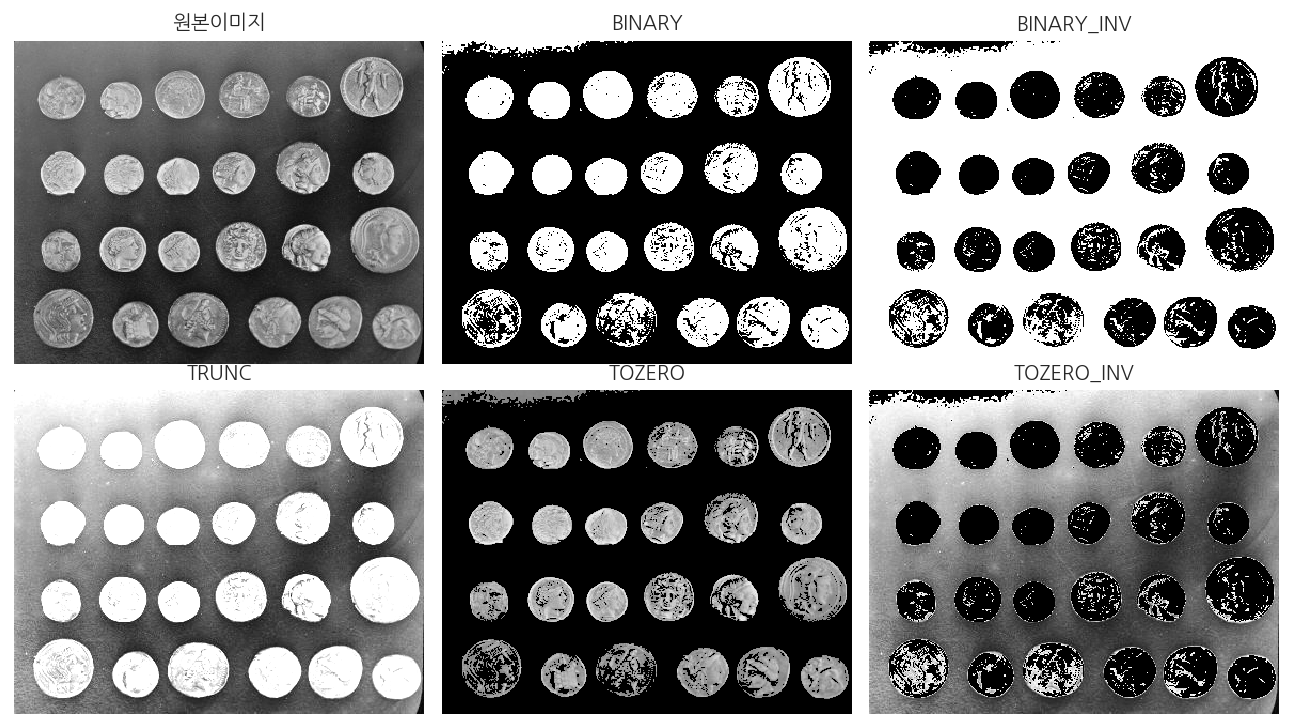

In [3]:
import cv2
from skimage.data import coins

img = coins()

maxval = 255
thresh = maxval / 2

# _는 원본이미지
_, thresh1 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY_INV)
_, thresh3 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TRUNC)
_, thresh4 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO)
_, thresh5 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO_INV)

titles = ['원본이미지', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(9, 5), facecolor="1.")
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i], fontdict={'fontsize': 10})
    plt.axis('off')

plt.tight_layout(pad=0.7)
plt.show()
# 컨투어링에서 경계선 추출을 잘 하기위해서
# thresh word 사용

##### 적응 임계처리

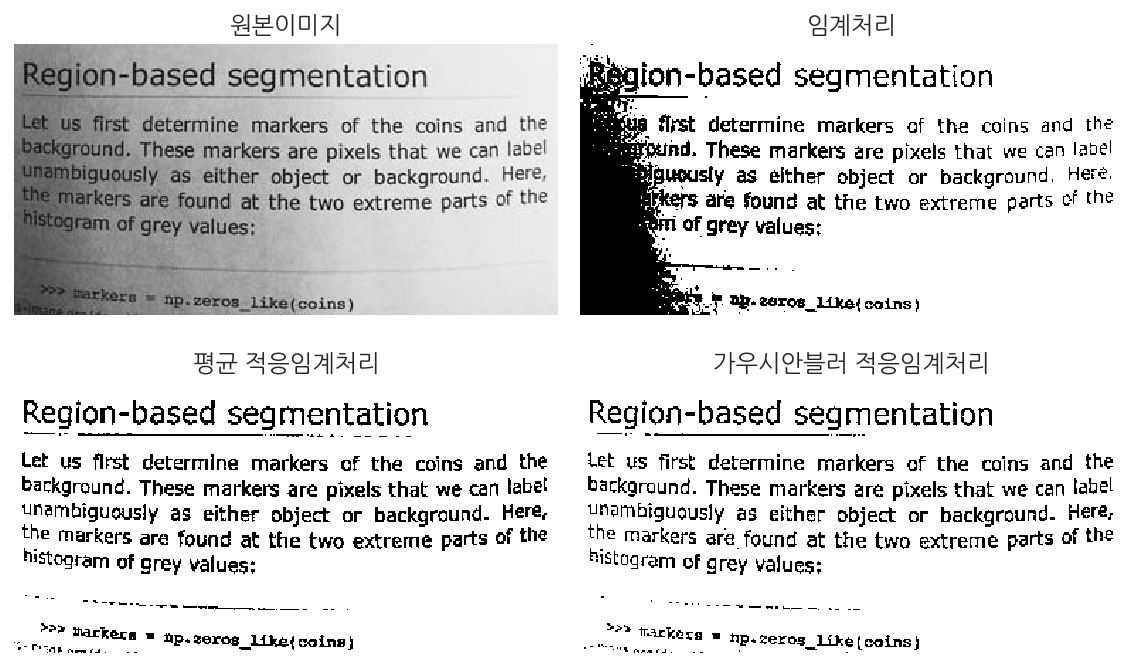

In [4]:
from skimage.data import page

img = page()

maxval = 255
thresh = 126
ret, th1 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)

k = 15
C = 20

th2 = cv2.adaptiveThreshold(
    img, maxval, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, k, C)
th3 = cv2.adaptiveThreshold(
    img, maxval, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, k, C)

images = [img, th1, th2, th3]
titles = ['원본이미지', '임계처리', '평균 적응임계처리', '가우시안블러 적응임계처리']

plt.figure(figsize=(8, 5), facecolor="1.")
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

##### 이미지 필터링

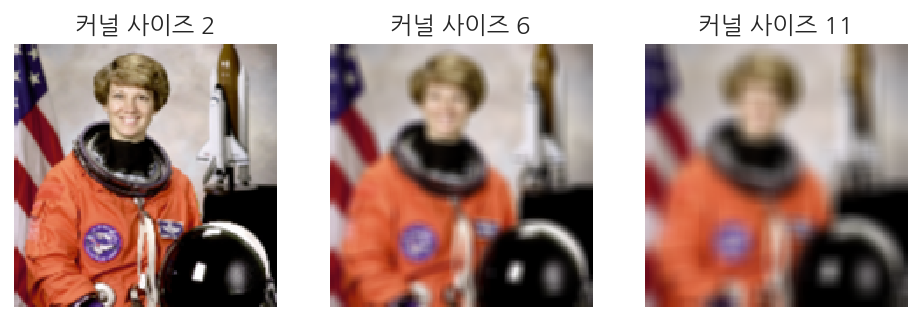

In [6]:
import cv2
from skimage.data import astronaut

img = astronaut()
img = cv2.resize(img, dsize=(150, 150))

plt.figure(figsize=(8, 3),facecolor="1.")
for i, k in enumerate([2, 6, 11]):
    kernel = np.ones((k, k)) / k**2
    filtering = cv2.filter2D(img, -1, kernel)
    plt.subplot(1, 3, i + 1)
    plt.imshow(filtering)
    plt.title("커널 사이즈 {}".format(k))
    plt.axis("off")

plt.show()

##### 블러

##### 평균 블러

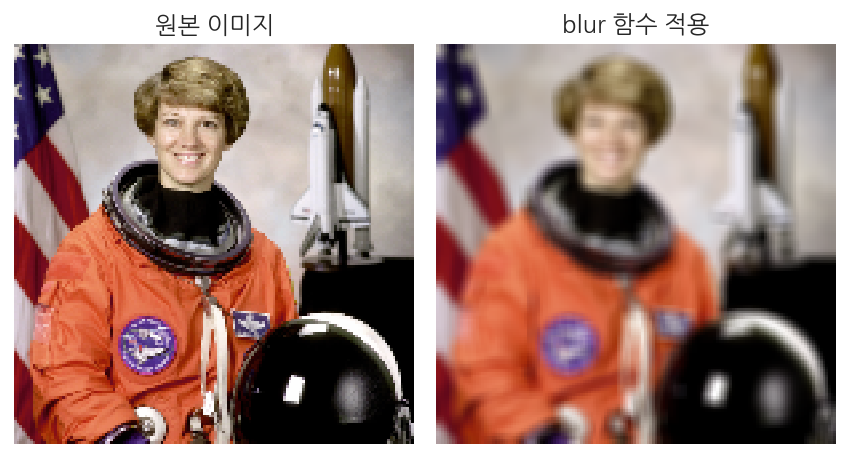

In [7]:
blur = cv2.blur(img, (5, 5))
boxfilter = cv2.boxFilter(img, -1, (5, 5))

plt.figure(facecolor="1.")
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("원본 이미지")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(blur)
plt.title("blur 함수 적용")
plt.axis('off')

plt.tight_layout()
plt.show()

##### 중앙값 블러

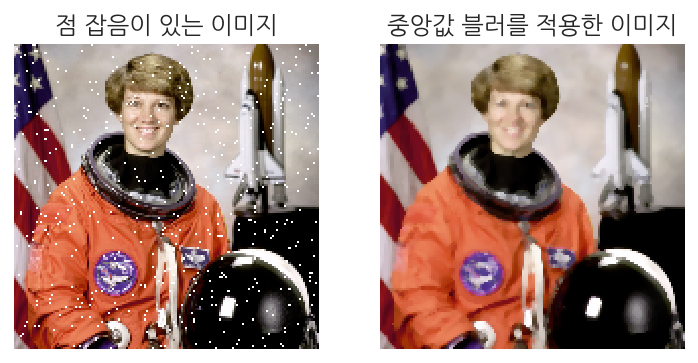

In [8]:
# 점 잡음 적용
img_noise = img.copy()

np.random.seed(0)
N = 500
idx1 = np.random.randint(img.shape[0], size=N)
idx2 = np.random.randint(img.shape[1], size=N)
img_noise[idx1, idx2] = 255

# 중앙값 블러로 잡음 제거
img_denoise = cv2.medianBlur(img_noise, 3)

plt.figure(facecolor="1.")
plt.subplot(1, 2, 1)
plt.imshow(img_noise)
plt.title("점 잡음이 있는 이미지")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_denoise)
plt.title("중앙값 블러를 적용한 이미지")
plt.axis('off')
plt.show()
# 평균 블러를 사용하면 점이 퍼짐
# 중앙값 블러를 사용하면 아웃라이어 제거 -> 점(아웃라이어) 제거 가능

##### 가우시안 블러
- 굉장히 넓은 범위를 필터링함

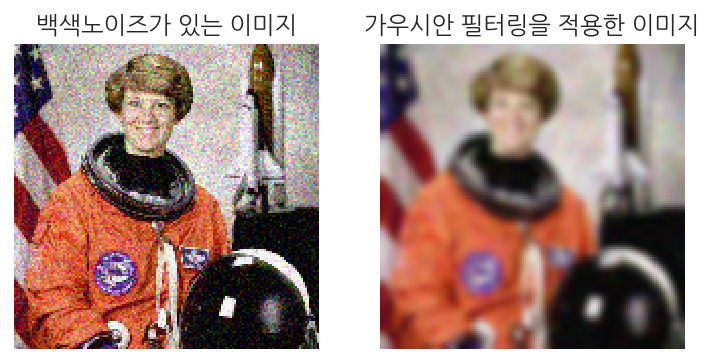

In [9]:
# 백색 잡음
img_noise = np.clip((img / 255 + np.random.normal(scale=0.1, size=img.shape)) * 255, 0, 255).astype('uint8')

# 가우시안 블러로 잡음 제거
img_denoise = cv2.GaussianBlur(img_noise, (9, 9), 2)

plt.figure(facecolor="1.")
plt.subplot(1, 2, 1)
plt.imshow(img_noise)
plt.title("백색노이즈가 있는 이미지")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_denoise)
plt.title("가우시안 필터링을 적용한 이미지")
plt.axis('off')

plt.show()

#### 양방향 필터링
- 값의 차이가 많이 나지 않으면 뭉갬
- 값의 차이가 많이 나면 뭉개지 않음 -> 경계선은 살림

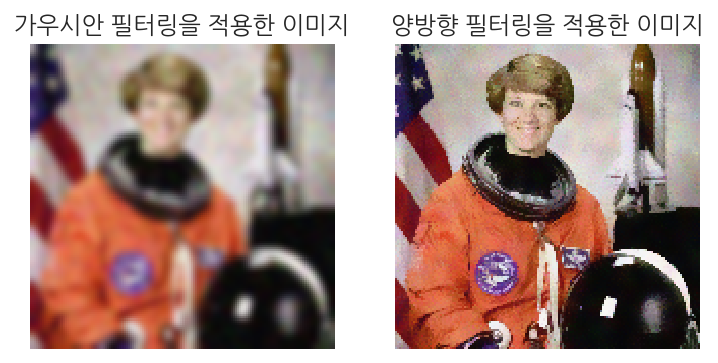

In [10]:
img_denoise1 = cv2.GaussianBlur(img_noise, (9, 9), 2)
img_denoise2 = cv2.bilateralFilter(img_noise, 9, 75, 75)

plt.figure(facecolor="1.")
plt.subplot(1, 2, 1)
plt.imshow(img_denoise1)
plt.title("가우시안 필터링을 적용한 이미지")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_denoise2)
plt.title("양방향 필터링을 적용한 이미지")
plt.axis('off')

plt.show()

###### 연습문제

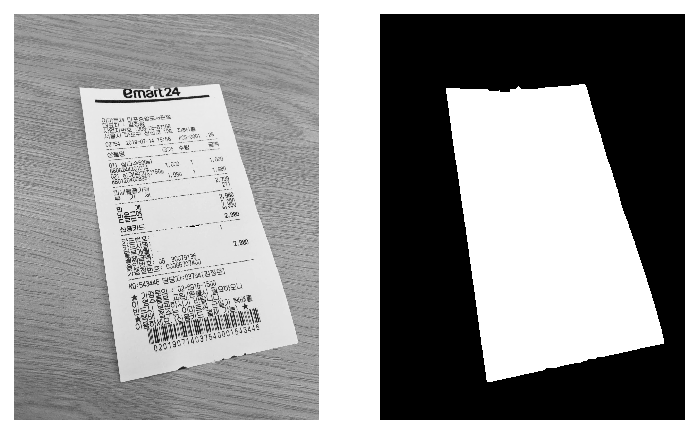

In [42]:
# 흑백
# bilateralFilter : 경계선을 남겨놓고 뭉갬
img_region = cv2.bilateralFilter(img, 30, 30, 30)
# 명도가 일정 이상 되는곳은 모두 검은색으로 바꿈
_, img_region = cv2.threshold(img_region, 180, 255, cv2.THRESH_BINARY)
# 블러링을 통해서 글자를 뭉갬
img_region = cv2.medianBlur(img_region, 11)
# 클로징
img_region = cv2.morphologyEx(img_region, cv2.MORPH_CLOSE, 
                              cv2.getStructuringElement(cv2.MORPH_RECT, (30, 30)),)

plt.figure(facecolor="1.")
plt.subplot(121)
plt.imshow(img, cmap = plt.cm.gray)
plt.axis("off")

plt.subplot(122)
plt.imshow(img_region, cmap = plt.cm.gray)
plt.axis("off")

plt.show()

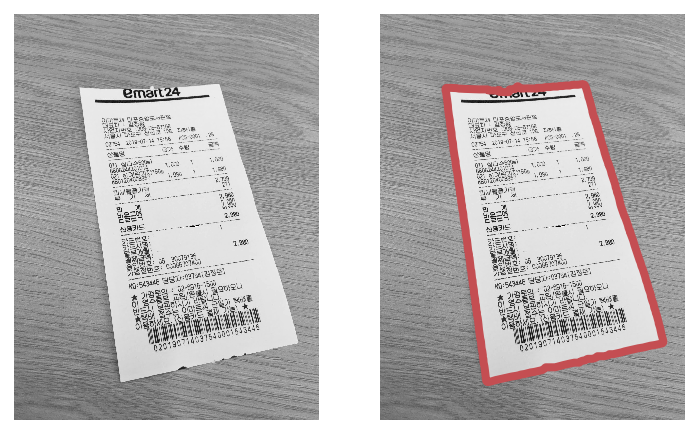

In [48]:
# 테두리
contours, hierachy = cv2.findContours(img_region, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)
c0 = contours[0]
x0, y0 = zip(*np.squeeze(c0))

plt.figure(facecolor="1.")
plt.subplot(121)
plt.imshow(img, cmap = plt.cm.gray)
plt.axis("off")

plt.subplot(122)
plt.imshow(img, cmap = plt.cm.gray)
plt.plot(x0, y0, c= "r", lw = 4)
plt.axis("off")

plt.show()

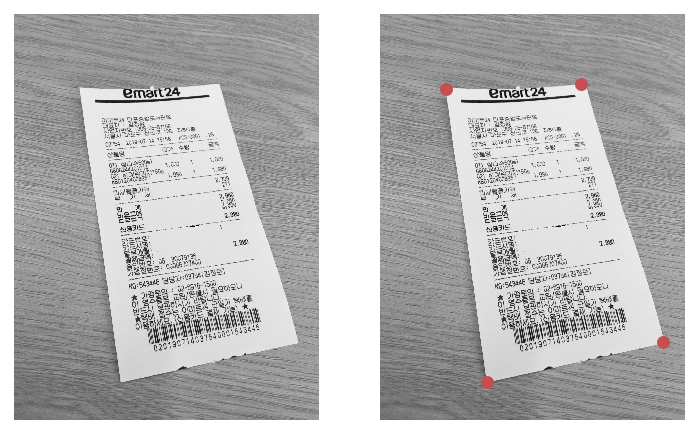

In [57]:
# 점찍기
leftmost = tuple(c0[c0[:, :, 0].argmin()][0])
rightmost = tuple(c0[c0[:, :, 0].argmax()][0])
topmost = tuple(c0[c0[:, :, 1].argmin()][0])
bottommost = tuple(c0[c0[:, :, 1].argmax()][0])
pts1 = np.float32([leftmost, rightmost, topmost, bottommost])

plt.figure(facecolor = "1.")
plt.subplot(121)
plt.imshow(img, cmap = plt.cm.gray)
plt.axis("off")

plt.subplot(122)
plt.imshow(img, cmap = plt.cm.gray)
plt.scatter(pts1[:, 0], pts1[:, 1], c = "r", marker = "o", s = 30)
plt.axis("off")
plt.show()

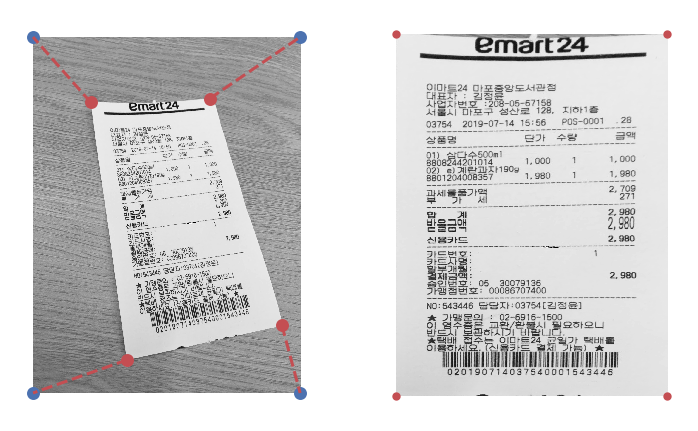

In [63]:
# 펼치기
pts2 = np.float32([[0,0], [1184, 1578], [1184, 0], [0, 1578]])

pts_x, pts_y = zip(*pts1)
pts_x_, pts_y_ = zip(*pts2)

rows, cols = img.shape[:2]
H = cv2.getPerspectiveTransform(pts1, pts2)
img2 = cv2.warpPerspective(img, H, (cols, rows))

plt.figure(facecolor = "1.")
plt.subplot(121)
plt.imshow(img, cmap = plt.cm.gray)
plt.scatter(pts1[:, 0], pts1[:, 1], c = "r", marker = "o", s = 30)
plt.scatter(pts2[:, 0], pts2[:, 1], c = "b", marker = "o", s = 30)
plt.plot(list(zip(*np.stack((pts1[:, 0], pts2[:, 0]), axis = 1))),
        list(zip(*np.stack((pts1[:, 1], pts2[:, 1]), axis = 1))), "--", c="r")
plt.axis("off")

plt.subplot(122)
plt.imshow(img2, cmap = plt.cm.gray)
plt.scatter(pts2[:, 0], pts2[:, 1], c = "r", marker = "o", s = 10)
plt.axis("off")
plt.show()